**ASHIKA PEMMAIAH B**

**ashika99.bp@gmail.com**


---



**STEP 1**

In [ ]:
# load library functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# load and view dataset
data = pd.read_csv("data.csv")
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
# display no. of rows and columns in dataset
rows,columns = data.shape
print("No. of rows: ",rows)
print("No. of columns: ",columns)

No. of rows:  11914
No. of columns:  16


In [4]:
# obtain column info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
# obtain statistical summary
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
# check for count of null values in each column
data.isnull().sum()
# null values to be handled in step 4

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64



---


**STEP 2**

In [7]:
# 'Market Category', 'Popularity', 'Number of Doors' and 'Engine Fuel Type' columns is not of much relevance/ significance in determining price of a car model
# hence, these columns can be removed
data = data.drop(['Market Category', 'Number of Doors', 'Engine Fuel Type'], axis=1)
data.head()


,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500




---


**STEP 3**

In [8]:
# renaming column names
data.rename( columns = { 'Engine HP' : 'HP', 
                                              'Engine Cylinders' : 'Cylinders' ,
                                              'Transmission Type' : 'Transmission' ,
                                              'Driven_Wheels' : 'Drive Mode' ,
                                               'highway MPG' : 'MPG-H' ,
                                               'city mpg' : 'MPG-C' ,
                                               'MSRP' : 'Price'}, inplace = True) 
data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500




---


**STEP 4**

In [9]:
# identify and remove duplicate rows
print("Count of duplicate rows in dataset: ",data.duplicated().sum())
data = data.drop_duplicates()
print("Size of dataset after removal of duplicate rows:",data.shape)

Count of duplicate rows in dataset:  792
Size of dataset after removal of duplicate rows: (11122, 13)


In [10]:
# replace null values in each column with median of that column
print("Initial Null value count")
print(data.isnull().sum())
data=data.fillna(data.median())
print("Final Null value count")
print(data.isnull().sum())

Initial Null value count
Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64
Final Null value count
Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64




---


**STEP 5**

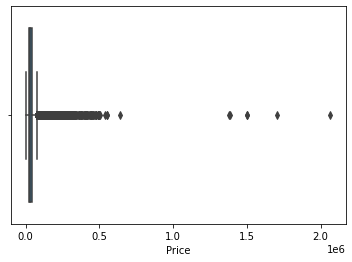

In [11]:
# boxplot for column: Price
sns.boxplot(x=data['Price'])

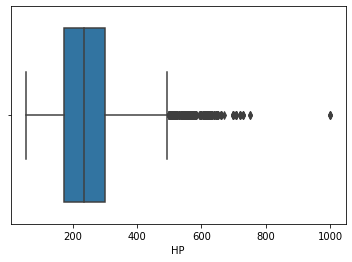

In [12]:
# boxplot for column: HP
sns.boxplot(x=data['HP'])

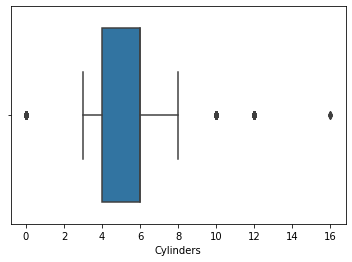

In [13]:
# boxplot for column: Cylinders
sns.boxplot(x=data['Cylinders'])

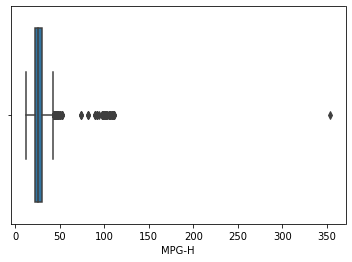

In [14]:
# boxplot for column: MPG-H
sns.boxplot(x=data['MPG-H'])

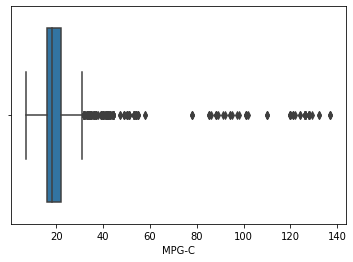

In [15]:
# boxplot for column: MPG-C
sns.boxplot(x=data['MPG-C'])

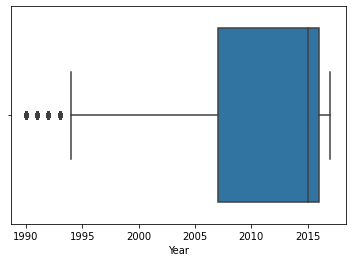

In [16]:
# boxplot for column: Year
sns.boxplot(x=data['Year'])

In [17]:
# view interquartile range for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              130.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21395.0
dtype: float64


In [18]:
# remove outliers from dataset
data = data[~((data < (Q1-1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(8576, 13)



---


**STEP 6**

Most represented car brand in dataset:  Chevrolet
Its count:  1033


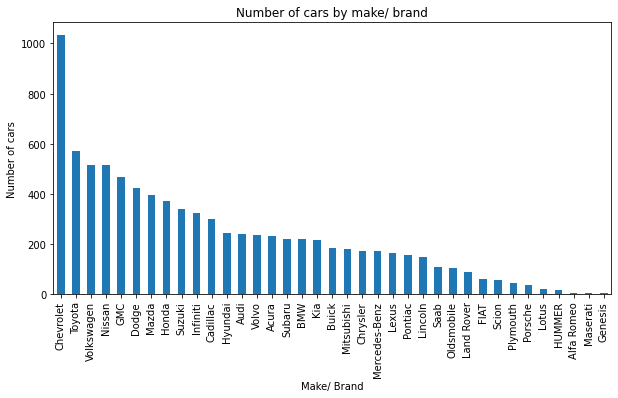

In [19]:
# Plotting a histogram to identify most represented car brand in dataset
data.Make.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make/ brand")
plt.ylabel("Number of cars")
plt.xlabel("Make/ Brand");

print("Most represented car brand in dataset: ",data['Make'].value_counts().idxmax())
print("Its count: ",max(data['Make'].value_counts()))

In [20]:
# displaying average price of top 5 car brands
prices = data[['Make','Price']].loc[
               (data['Make'] == 'Chevrolet')|
               (data['Make'] == 'Ford')|
               (data['Make'] == 'Toyota')|
               (data['Make'] == 'Volkswagen')|
               (data['Make'] == 'Nissan')
               ].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28207.045499
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476




---


**STEP 7**




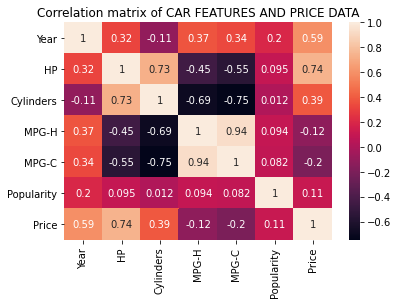

In [21]:
# plot correlation matrix
c = data.corr()
plt.title("Correlation matrix of CAR FEATURES AND PRICE DATA")
sns.heatmap(c,annot=True);


**DOCUMENTATION:**

*POSITIVELY CORELATED VARIABLE/ COLUMN PAIRS IN DATASET :*
*   Year & HP
*   Year & MPG-C
*   Year & MPG-H
*   Year & price
*   HP & Cylinders
*   HP and Price
*   Cylinders & Price
*   MPG-H & MPG-C

*NEGATIVELY CORELATED VARIABLE/ COLUMN PAIRS IN DATASET :*
*   Year & Cylinders
*   HP & MPG-C
*   HP and MPG-H
*   Cylinders & MPG-H
*   Cylinders & MPG-C
*   MPG-H & Price
*   MPG-C & Price


*KEY CONCLUSIONS:*

*   More the number of cylinders, more powerful the car is.
*   Highway mpg / Engine Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption.



















---

**STEP 8**

**plotting graphs to indicaticate variation of car price w.r.t various features**

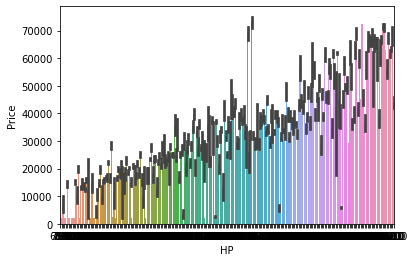

In [22]:
sns.barplot(data['HP'],data['Price']);

Inference: Greater the HP, greater is the price of the car

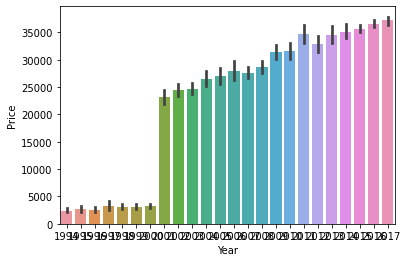

In [23]:
sns.barplot(data['Year'],data['Price']);

Inference: Price of cars increased drastically from the year 2000

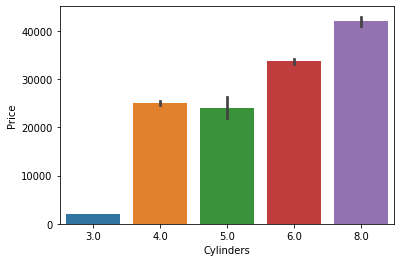

In [24]:
sns.barplot(data['Cylinders'],data['Price']);

Inference: Greater the number of cylinders, greater is the price of the car

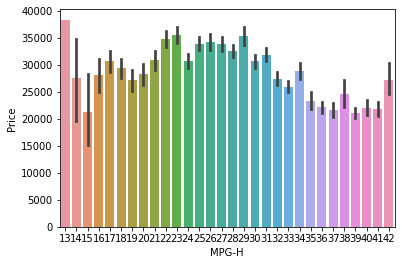

In [25]:
sns.barplot(data['MPG-H'],data['Price']);

Inference:


*   Price is maximum for MPG-H = 13
*   Price is miniimum for MPG-H = 39



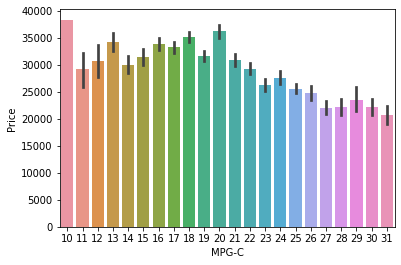

In [26]:
sns.barplot(data['MPG-C'],data['Price'])

Inference:


*   Price is maximum for MPG-C = 10
*   Price is miniimum for MPG-C = 31



**PLOT A GRAPH AND CHECK THE MAXIMUM NUMBER OF CARS SOLD BY TYPE/ BODY**

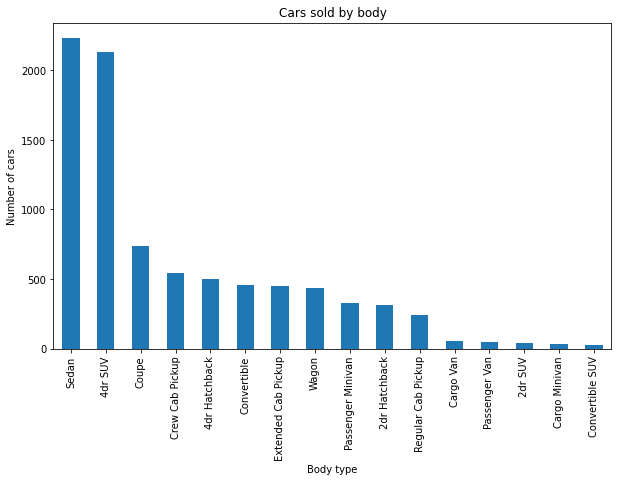

In [27]:
data['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))              
plt.title("Cars sold by body")
plt.ylabel('Number of cars')
plt.xlabel('Body type');

Inference: Sedans are maximally sold car models w.r.t body type

**Vehicle Style type and Drive type analysis**

Text(0.5, 0, 'Count of vehicles')

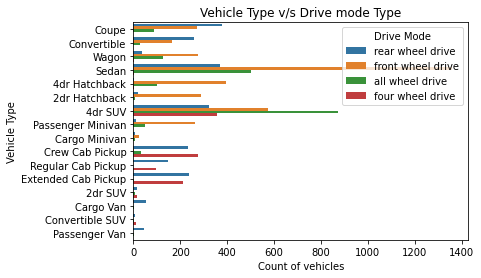

In [28]:
sns.countplot(y='Vehicle Style',data=data, hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')



---
**STEP 9**


In [29]:
X = data[['Popularity','Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = data['Price'].values

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

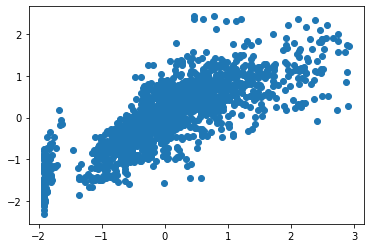

In [33]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred);

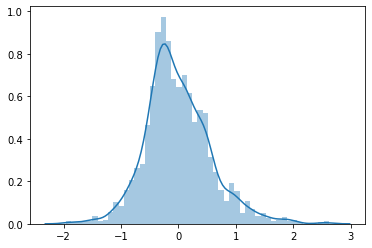

In [34]:
sns.distplot((y_test-y_pred),bins=50);

In [35]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4370457257743065
Root Mean Squared Error: 0.5708784620501421
R2 Score: 0.6620632881930043




---
**STEP 10**


In [36]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

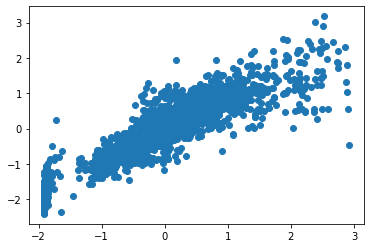

In [37]:
# Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred);

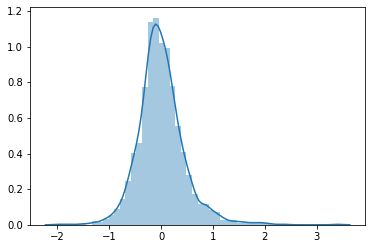

In [38]:
sns.distplot((y_test-y_pred),bins=50);

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.32655375358892047
Root Mean Squared Error: 0.45243748113100357
R2 Score: 0.7877414422508666


In [ ]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

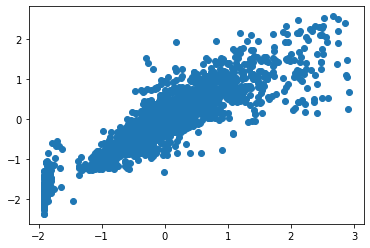

In [41]:
# Predicting a new result
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred);

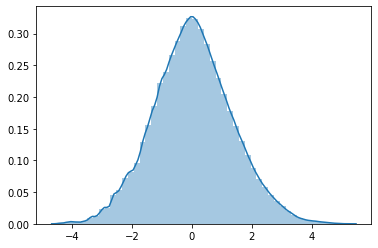

In [42]:
sns.distplot((y_test-y_pred),bins=50);

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.31017224435669766
Root Mean Squared Error: 0.44484888222779856
R2 Score: 0.7948020278652927


In [44]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

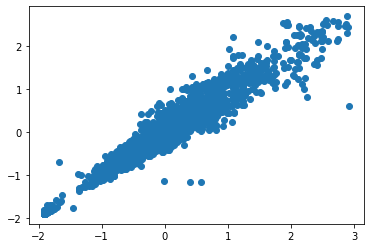

In [45]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred);

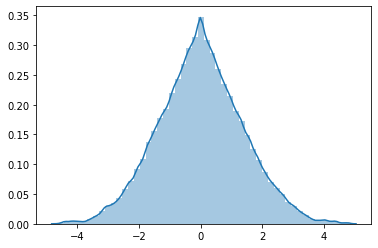

In [46]:
sns.distplot((y_test-y_pred),bins=50);

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.1854932473551492
Root Mean Squared Error: 0.264716219698956
R2 Score: 0.9273376964703194




---

